# IBM Machine Learning -                                                                          Supervised Machine Learning Classification Report

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
df_churn = pd.read_csv('churn_data.csv')
df_customer = pd.read_csv('customer_data.csv')
df_internet = pd.read_csv('internet_data.csv')

In [3]:
df = pd.merge(df_internet,df_customer, how='inner', on='customerID')
df = pd.merge(df_churn,df, how='inner', on='customerID')

In [4]:
# view data exported
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,...,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,...,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,...,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,...,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,...,No,No,No,No,No,No,Female,0,No,No


# Data Preprocessing

In [5]:
df_processing = df.copy()

In [6]:
# info of data
df_processing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
 9   MultipleLines     7042 non-null   object 
 10  InternetService   7042 non-null   object 
 11  OnlineSecurity    7042 non-null   object 
 12  OnlineBackup      7042 non-null   object 
 13  DeviceProtection  7042 non-null   object 
 14  TechSupport       7042 non-null   object 
 15  StreamingTV       7042 non-null   object 
 16  StreamingMovies   7042 non-null   object 


In [7]:
# =====Data Formating (data types)======
df_processing.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
dtype: object

In [58]:
df_processing.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7026    1419.40
7027    1990.50
7028    7362.90
7029     346.45
7030     306.60
Name: TotalCharges, Length: 7031, dtype: float64

In [8]:
# Handling object data type
object_type =  df_processing.dtypes == np.object
obj_col = df_processing.columns[object_type]
df_process_obj = df_processing[obj_col]
df_process_obj['TotalCharges'] = pd.to_numeric(df_process_obj['TotalCharges'],errors='coerce')
df_processing['TotalCharges'] = df_process_obj['TotalCharges']


<ipython-input-8-5dddbe05cf63>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_process_obj['TotalCharges'] = pd.to_numeric(df_process_obj['TotalCharges'],errors='coerce')


In [9]:
df_processing.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
dtype: object

In [10]:
# =========Dealing missing data=========
df_processing.isnull().sum()


customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
dtype: int64

In [11]:
# remove the missing rows due to low amount of missing data 
df_processing.dropna(axis=0, inplace=True)
df_processing.shape

# Recheck the missing data 
df_processing.isnull().sum()
df_processing.isnull().sum().apply(lambda x: x/df_processing.shape[0]*100)

df_processing = df_processing.reset_index()
df_processing.drop(['index'], axis=1, inplace=True)

df_processing.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
dtype: int64

# EDA

In [12]:
df_eda = df_processing.copy()

In [13]:
# number of rows and columns
num_rows, num_cols = df_eda.shape
print(f'There are {num_rows} rows and {num_cols} columns.')

There are 7031 rows and 21 columns.


In [60]:
df_eda.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
dtype: object

In [14]:
# view columns in data set
df_eda.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents'],
      dtype='object')

In [15]:
# Descriptive Analysis
df_eda.describe()


,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7031.000000,7031.000000,7031.000000,7031.000000
mean,32.417010,64.792398,2282.651714,0.162424
std,24.543738,30.084168,2266.279660,0.368865
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.575000,401.400000,0.000000
50%,29.000000,70.350000,1397.300000,0.000000
75%,55.000000,89.850000,3793.050000,0.000000
max,72.000000,118.750000,8684.800000,1.000000


In [16]:
# Descriptive Analysis (object)
df_eda.describe(include='object')

,customerID,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,Partner,Dependents
count,7031,7031,7031,7031,7031,7031,7031,7031,7031,7031,7031,7031,7031,7031,7031,7031,7031
unique,7031,2,3,2,4,2,3,3,3,3,3,3,3,3,2,2,2
top,0308-GIQJT,Yes,Month-to-month,Yes,Electronic check,No,No,Fiber optic,No,No,No,No,No,No,Male,No,No
freq,1,6351,3875,4167,2365,5162,3384,3095,3497,3086,3094,3472,2809,2781,3548,3638,4932


<AxesSubplot:xlabel='Churn', ylabel='count'>

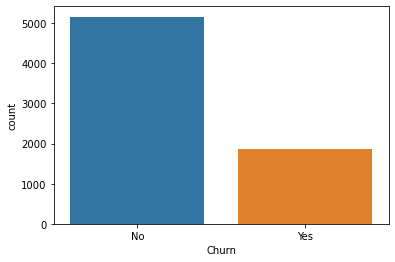

In [17]:
# Churn count
sns.countplot(data=df_eda, x='Churn')

<AxesSubplot:xlabel='Contract', ylabel='count'>

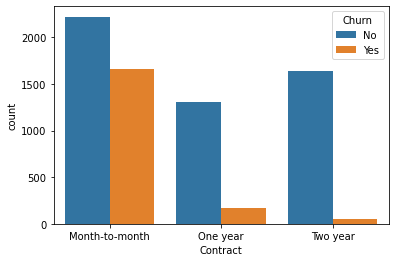

In [18]:
# Contract churn
figsize=(15, 10)
sns.countplot(data=df_eda, x='Contract', hue='Churn')

<AxesSubplot:xlabel='Churn', ylabel='count'>

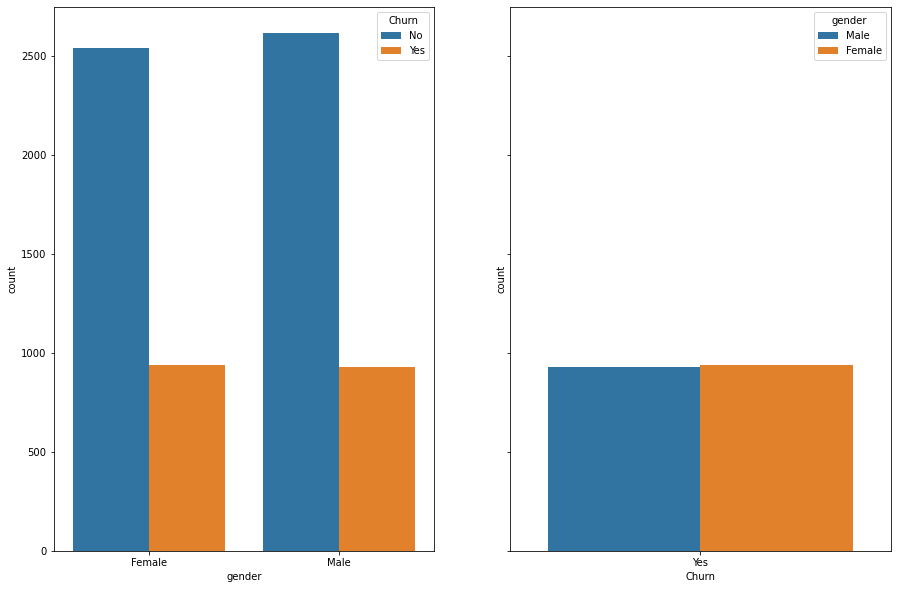

In [19]:
# EDA boxplot of number of children and expenses 
fig, axes = plt.subplots(1,2, figsize=(15, 10), sharey=True)
sns.countplot(ax=axes[0],data=df_eda, x='gender', hue='Churn')

# EDA boxplot of region and expenses with category of smoker or non-smoker 
sns.countplot(ax=axes[1], data=df_eda[df_eda['Churn'] == 'Yes'], x='Churn' , hue='gender')

<AxesSubplot:xlabel='InternetService', ylabel='count'>

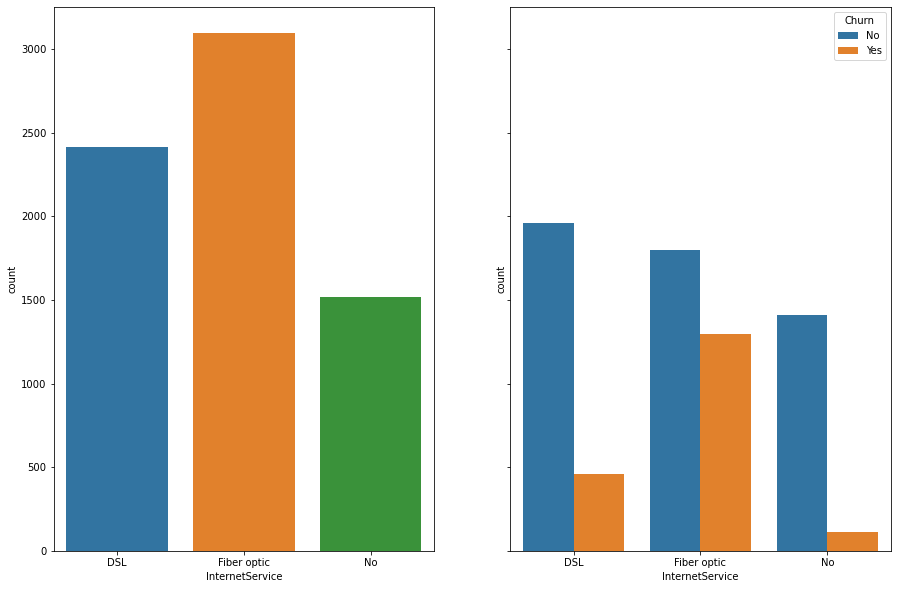

In [20]:
# InternetService
fig, axes = plt.subplots(1,2, figsize=(15, 10), sharey=True)
sns.countplot(ax=axes[0],data=df_eda, x='InternetService' )

sns.countplot(ax=axes[1], data=df_eda, x='InternetService' ,hue='Churn' )

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

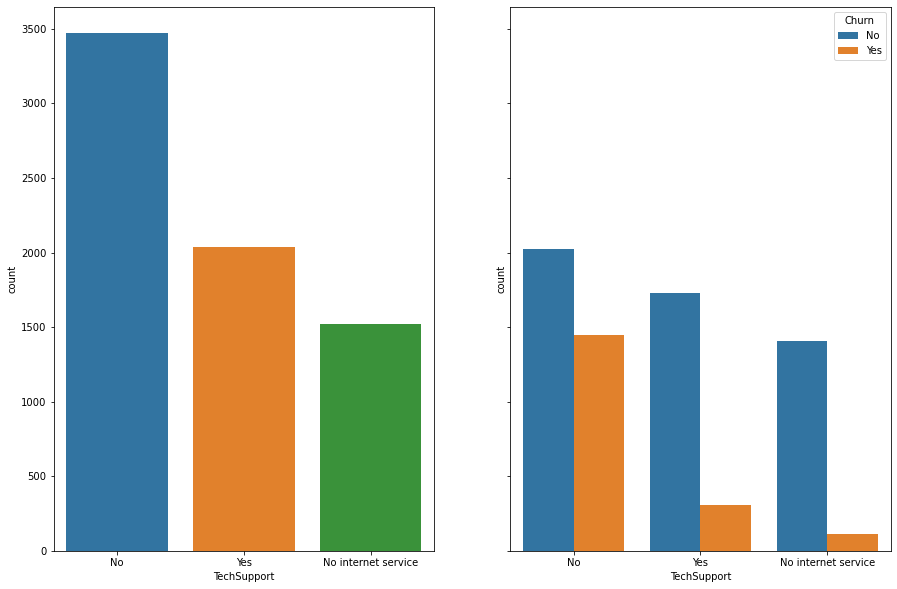

In [21]:
# TechSupport
fig, axes = plt.subplots(1,2, figsize=(15, 10), sharey=True)

sns.countplot(ax=axes[0],data=df_eda, x='TechSupport' )

sns.countplot(ax=axes[1],data=df_eda, x='TechSupport' ,hue='Churn' )

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

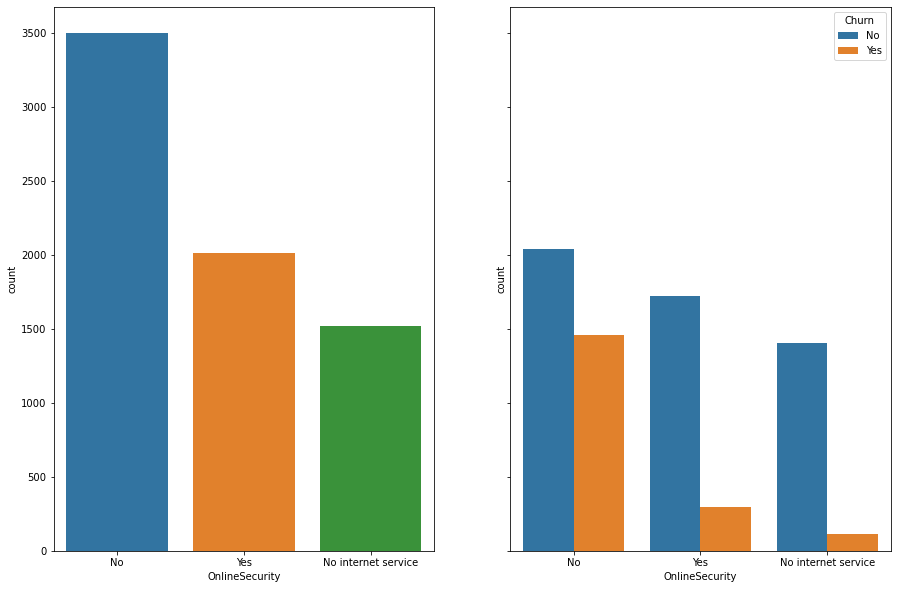

In [22]:
# OnlineSecurity
fig, axes = plt.subplots(1,2, figsize=(15, 10), sharey=True)
sns.countplot(ax=axes[0],data=df_eda, x='OnlineSecurity' )

sns.countplot(ax=axes[1],data=df_eda, x='OnlineSecurity' ,hue='Churn' )


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

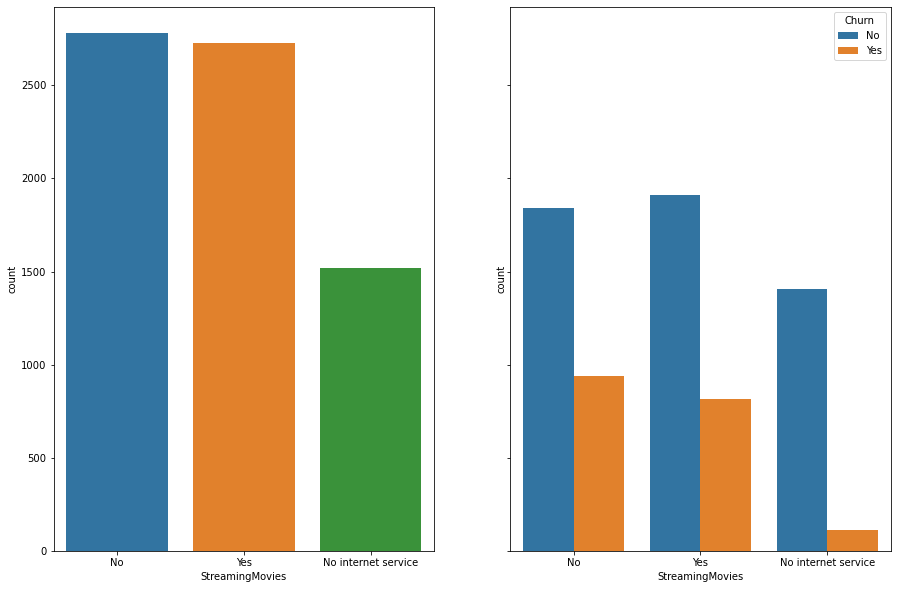

<Figure size 1080x720 with 0 Axes>

In [23]:
# StreamingMovies
fig, axes = plt.subplots(1,2, figsize=(15, 10), sharey=True)
sns.countplot(ax=axes[0],data=df_eda, x='StreamingMovies' )
plt.figure(figsize=(15,10))
sns.countplot(ax=axes[1],data=df_eda, x='StreamingMovies' ,hue='Churn' )

# Feature Engineering

In [83]:
df_feat = df_eda.copy() 

In [84]:
# Removing columns with all unique values (ID)
df_feat.drop(df_feat.columns[df_feat.nunique() == df_feat.shape[0]],axis=1,inplace=True)
df_feat.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,34,Yes,One year,No,Mailed check,56.95,1889.50,No,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No


In [85]:
# Handling Unique values
df_feat_unique = df_feat.dtypes == np.object
df_feat_unique = df_feat[df_feat.columns[df_feat_unique]]
df_feat_unique = df_feat_unique.nunique()
df_feat_unique

PhoneService        2
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
gender              2
Partner             2
Dependents          2
dtype: int64

In [86]:
# Binary varaibles 
binary_values = list(df_feat_unique[df_feat_unique == 2].index)
binary_values
pd.DataFrame(binary_values,columns=['Binary_varaibles '])

,Binary_varaibles
0,PhoneService
1,PaperlessBilling
2,Churn
3,gender
4,Partner
5,Dependents


In [87]:
# categorical varables
categorical_values = list(df_feat_unique[df_feat_unique > 2].index)
[[i, list(df_feat[i].unique()) ] for i in categorical_values]


[['Contract', ['Month-to-month', 'One year', 'Two year']],
 ['PaymentMethod',
  ['Electronic check',
   'Mailed check',
   'Bank transfer (automatic)',
   'Credit card (automatic)']],
 ['MultipleLines', ['No phone service', 'No', 'Yes']],
 ['InternetService', ['DSL', 'Fiber optic', 'No']],
 ['OnlineSecurity', ['No', 'Yes', 'No internet service']],
 ['OnlineBackup', ['Yes', 'No', 'No internet service']],
 ['DeviceProtection', ['No', 'Yes', 'No internet service']],
 ['TechSupport', ['No', 'Yes', 'No internet service']],
 ['StreamingTV', ['No', 'Yes', 'No internet service']],
 ['StreamingMovies', ['No', 'Yes', 'No internet service']]]

In [121]:
# Ordinal varables
Ordinal_varables = ['Contract']
Ordinal_varables
pd.DataFrame(Ordinal_varables, columns=['Ordinal_varables'])

,Ordinal_varables
0,Contract


In [89]:
# Numeric_values
Numeric_values = list(set(df_feat_unique.index) - set(binary_values)-set(Ordinal_varables))
pd.DataFrame(Numeric_values,columns=['Numeric_variables'])

,Numeric_variables
0,DeviceProtection
1,StreamingTV
2,OnlineSecurity
3,PaymentMethod
4,MultipleLines
5,InternetService
6,TechSupport
7,OnlineBackup
8,StreamingMovies


In [90]:
# Perform Feature Encoding on categorical data
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder, MinMaxScaler
lb, le, oe = LabelBinarizer(), LabelEncoder(), OrdinalEncoder()

# OHC binary_values
for column in binary_values:
    df_feat[column] = lb.fit_transform(df_feat[column])

# Categorical_varaiables
Categorical_varaiables = list(set(Numeric_values) - set(Ordinal_varables) - set(binary_values))
df_feat =  pd.get_dummies(df_feat, columns=Categorical_varaiables, drop_first=True)
    

# OHC Ordinal_varables
for column in Ordinal_varables:
    df_feat[column] = le.fit_transform(df_feat[column])
    
df_feat.isnull().sum()   


from sklearn.preprocessing import StandardScaler
df_feat[df_feat.columns[df_feat.dtypes == np.uint8]] = df_feat[df_feat.columns[df_feat.dtypes == np.uint8]].astype(float)

sc = StandardScaler()
for column in [['tenure','MonthlyCharges','TotalCharges']]:
    df_feat[column] = sc.fit_transform(df_feat[column])

In [123]:
df[['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7037,72,21.15,1419.4
7038,24,84.80,1990.5
7039,72,103.20,7362.9
7040,11,29.60,346.45


In [124]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,...,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,...,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,...,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,...,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,...,No,No,No,No,No,No,Female,0,No,No


# MACHINE LEARNING 

In [92]:
#import library
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, recall_score, roc_auc_score

In [93]:
df_ml = df_feat.copy()

In [94]:
df_ml.head()

,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,...,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_No internet service,TechSupport_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,-1.280133,0,0,1,-1.161571,-0.994124,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.064501,1,1,0,-0.260700,-0.173491,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.239386,1,0,1,-0.363752,-0.959571,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.512713,0,1,0,-0.747702,-0.195004,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.239386,1,0,1,0.196383,-0.940375,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
df_ml.shape

(7031, 30)

In [96]:
df_ml.Churn.value_counts()

0    5162
1    1869
Name: Churn, dtype: int64

In [97]:
df_ml.Churn.value_counts().apply(lambda x: x/df_ml.shape[0]*100)

0    73.417722
1    26.582278
Name: Churn, dtype: float64

In [98]:
feature_cols = list(df_ml.columns)
feature_cols.remove('Churn')

In [99]:
# Split data
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)


train_idx, test_idx = next(strat_shuf_split.split(df_ml[feature_cols], df_ml.Churn))

train_idx.shape
test_idx.shape

X_train = df_ml.loc[train_idx, feature_cols]
y_train = df_ml.loc[train_idx, 'Churn']

X_test  = df_ml.loc[test_idx, feature_cols]
y_test  = df_ml.loc[test_idx, 'Churn']


In [100]:
print(f"Shape for X_train is: {X_train.shape}")
print(f"Shape for y_train is: {y_train.shape}")
print(" ")
print(f"Shape for X_test is: {X_test.shape}")
print(f"Shape for y_test is: {y_test.shape}")

Shape for X_train is: (4921, 29)
Shape for y_train is: (4921,)
 
Shape for X_test is: (2110, 29)
Shape for y_test is: (2110,)


# Machine Learning Model - (Logistic Regression)

In [101]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_prob_lr = lr.predict_proba(X_test)


X_train.isnull().sum()

y_prob = lr.predict_proba(X_test)
y_prob[:,1] 

score_lr = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_lr),
                         'precision': precision_score(y_test, y_pred_lr),
                         'recall': recall_score(y_test, y_pred_lr),
                         'f1': f1_score(y_test, y_pred_lr),
                         'auc': roc_auc_score(y_test, y_prob[:,1])},
                         index=['Logistic Regression'])

In [102]:
lr_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_lr))
lr_cm

,0,1
0,1374,175
1,244,317


In [103]:
lr_cr = pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True)).iloc[:3,:2]
lr_cr

,0,1
precision,0.849197,0.644309
recall,0.887024,0.565062
f1-score,0.867698,0.602089


# Machine Learning Model - (K-Nearest Neighbors)

Text(0, 0.5, 'Error Rate')

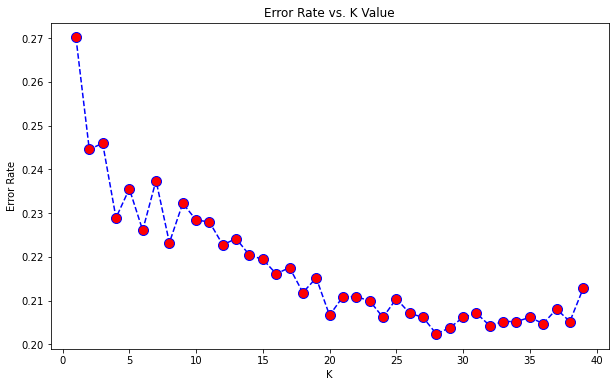

In [132]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [133]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test) 

y_prob = knn.predict_proba(X_test)
y_prob[:,1] 

score_knn = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_knn),
                         'precision': precision_score(y_test, y_pred_knn),
                         'recall': recall_score(y_test, y_pred_knn),
                         'f1': f1_score(y_test, y_pred_knn),
                         'auc': roc_auc_score(y_test, y_prob[:,1])},
                         index=['KNN'])

In [134]:
knn_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_knn))
knn_cm

,0,1
0,1342,207
1,228,333


In [135]:
knn_cr = pd.DataFrame(classification_report(y_test, y_pred_knn, output_dict=True)).iloc[:3,:2]
knn_cr

,0,1
precision,0.854777,0.616667
recall,0.866365,0.593583
f1-score,0.860532,0.604905


# Machine Learning Model - (Decision Tree Classification)

In [108]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
dt.tree_.node_count, dt.tree_.max_depth

dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

y_prob = dt.predict_proba(X_test)
y_prob[:,1] 

score_dt = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_dt),
                         'precision': precision_score(y_test, y_pred_dt),
                         'recall': recall_score(y_test, y_pred_dt),
                         'f1': f1_score(y_test, y_pred_dt),
                         'auc': roc_auc_score(y_test, y_prob[:,1])},
                         index=['Decision Tree Classification'])

In [130]:
dt_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_dt))
dt_cm

,0,1
0,1263,286
1,303,258


In [131]:
dt_cr = pd.DataFrame(classification_report(y_test, y_pred_dt, output_dict=True)).iloc[:3,:2]
dt_cr

,0,1
precision,0.806513,0.474265
recall,0.815365,0.459893
f1-score,0.810915,0.466968


# Machine Learning Model - (Random Forest Classification)

D:\anacondasetup\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anacondasetup\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
D:\anacondasetup\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anacondasetup\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
D:\anacondasetup\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimat

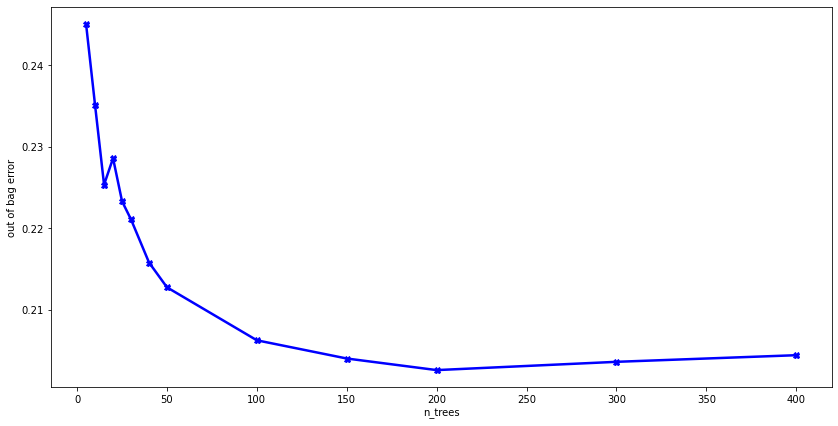

In [125]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

# initialise list for out of bag error
oob_list = list()

# Iterate through all of the possibilities for number of trees
for n_trees in [5, 10, 15, 20, 25, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)
    
    # Fit the model
    RF.fit(X_train, y_train)
    
    # Get the out of bag error and store it
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')



ax = rf_oob_df.plot(legend=False, marker='X', color="blue", figsize=(14, 7), linewidth=2.5)
ax.set(ylabel='out of bag error');

In [136]:

rf = RF.set_params(n_estimators=200)

y_pred_rf = rf.predict(X_test)

y_prob = rf.predict_proba(X_test)
y_prob[:,1] 

score_rf = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_rf),
                         'precision': precision_score(y_test, y_pred_rf),
                         'recall': recall_score(y_test, y_pred_rf),
                         'f1': f1_score(y_test, y_pred_rf),
                         'auc': roc_auc_score(y_test, y_prob[:,1])},
                         index=['Random Forest Classification'])

In [137]:
rf_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_rf))
rf_cm

,0,1
0,1386,163
1,293,268


In [138]:
rf_cr = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).iloc[:3,:2]
rf_cr

,0,1
precision,0.825491,0.621810
recall,0.894771,0.477718
f1-score,0.858736,0.540323


In [139]:
df_metrics = pd.DataFrame()
df_metrics.append([score_lr, score_knn, score_dt, score_rf])


,accuracy,precision,recall,f1,auc
Logistic Regression,0.801422,0.644309,0.565062,0.602089,0.836583
KNN,0.793839,0.616667,0.593583,0.604905,0.826006
Decision Tree Classification,0.720853,0.474265,0.459893,0.466968,0.638181
Random Forest Classification,0.783886,0.621810,0.477718,0.540323,0.816695
